In [ ]:
pip install yfinance

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

In [4]:
#base
import numpy as np
import pandas as pd
from collections import Counter
import ssl
from copy import deepcopy


#visual
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.font_manager import fontManager
from tqdm.notebook import tqdm


#time
import datetime as dt
 
#finance
import yfinance as yf
import talib

#model
import sklearn
from sklearn.preprocessing import StandardScaler

#一、资料载入

In [5]:

#data=yf.download('2330.TW','2021-01-01','2022-12-25')
data= yf.Ticker('2330.TW').history(period="max")

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+08:00,35.393482,35.393482,34.796967,35.393482,200662336736,0.0,0.0
2000-01-05 00:00:00+08:00,35.393492,36.188782,34.995752,36.188782,402466805912,0.0,0.0
2000-01-06 00:00:00+08:00,35.989997,36.188772,35.393482,35.393482,197545715802,0.0,0.0
2000-01-07 00:00:00+08:00,34.200464,34.796979,33.802724,34.399239,235270344752,0.0,0.0
2000-01-10 00:00:00+08:00,35.393495,35.791045,34.796980,35.592270,276171685539,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,0.0,0.0
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,0.0,0.0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,0.0,0.0


#二、特徵指標

技術指標：https://tw.stock.yahoo.com/news/%E6%8A%80%E8%A1%93%E5%88%86%E6%9E%90-%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-kd%E5%80%BC-085812299.html

https://chan-yi.com/%E5%8B%95%E9%87%8F%E6%8C%87%E6%A8%99/



KD：隨機指標，表示目前價格相對過去一段期間的高低變化。

RSI：股價強弱指標，表示買賣盤雙方力道的強弱。https://chan-yi.com/rsi%e6%8c%87%e6%a8%99%e5%af%a6%e6%88%b0%e5%85%a8%e8%a7%a3%e6%9e%90/

MACD：長期與短期移動平均線收斂或發散指標。https://chan-yi.com/5%e5%88%86%e9%90%98%e5%ad%b8%e6%9c%83macd%e6%8c%87%e6%a8%99%ef%bc%8c%e6%89%be%e5%88%b0%e6%bc%b2%e8%b7%8c%e9%96%93%e7%9a%84%e8%b2%b7%e8%b3%a3%e9%bb%9e/

MOM：主要是用來觀察價格走勢的變化幅度，以及行情的趨動方向。https://zhuanlan.zhihu.com/p/344764319

總經指標：

台股平均本益比：以上市公司取平均，可看出整體投資人對整個市場的看法是樂觀還是悲觀。


## 2.1 技術指標：KD、RSI、MACD、MOM

In [7]:

data["rsi"] = talib.RSI(data["Close"], timeperiod=14)# type: ignore
data['macd'], data['macdsig'],data['macdhist'] = talib.MACD(data["Close"], fastperiod=12, slowperiod=26, signalperiod=9)# type: ignore
data['kdf'], data['kds'] = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=9,slowk_period=3,slowk_matype=1,slowd_period=3,slowd_matype=1)# type: ignore
data["mom"] = talib.MOM(data["Close"],timeperiod=15)# type: ignore

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,macdsig,macdhist,kdf,kds,mom
Date,,,,,,,,,,,,,,
2000-01-04 00:00:00+08:00,35.393490,35.393490,34.796975,35.393490,200662336736,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+08:00,35.393499,36.188789,34.995759,36.188789,402466805912,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+08:00,35.990005,36.188780,35.393490,35.393490,197545715802,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+08:00,34.200467,34.796982,33.802727,34.399242,235270344752,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10 00:00:00+08:00,35.393495,35.791045,34.796980,35.592270,276171685539,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-22 00:00:00+08:00,466.500000,469.000000,464.000000,468.000000,14047382,0.0,0.0,50.976963,2.835307,6.954927,-4.119621,32.440262,25.944164,-27.647003
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,0.0,0.0,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,0.0,0.0,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355


## 2.2 總經指標：台股平均本益比

# 三、刪除空值與無用欄位

In [8]:
data = data.fillna(method="pad",axis=0)
data = data.dropna(axis=0)
#del data["Adj Close"]
del data["Dividends"]
del data["Stock Splits"]

#四、買賣訊號

用移動平均MA結合動能指標RSI來定義趨勢，簡單運用MA10 > MA20 且 RSI10 >RSI20時，判斷為上升趨勢



In [9]:
data["short_mom"] = data["rsi"].rolling(window=10,min_periods=1,center=False).mean()
data["long_mom"] = data["rsi"].rolling(window=20,min_periods=1,center=False).mean()
data["short_mov"] = data["Close"].rolling(window=10,min_periods=1,center=False).mean()
data["long_mov"] = data["Close"].rolling(window=20,min_periods=1,center=False).mean()

In [10]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,short_mom,long_mom,short_mov,long_mov
Date,,,,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153929,42.551669,41.159864,41.358639,121805090619,58.679950,1.770317,2.112726,-0.342409,41.626380,50.618429,0.795292,58.679950,58.679950,41.358639,41.358639
2000-02-21 00:00:00+08:00,40.364383,40.364383,38.773617,38.773617,153903007581,43.938751,1.409378,1.972056,-0.562679,20.813190,35.715810,-1.590767,51.309350,51.309350,40.066128,40.066128
2000-02-22 00:00:00+08:00,38.177102,39.370132,37.779552,38.773617,168143612807,43.938751,1.110529,1.799751,-0.689222,18.218043,26.966926,-1.391975,48.852484,48.852484,39.635291,39.635291
2000-02-23 00:00:00+08:00,38.773616,38.773616,38.376066,38.574841,73892584628,42.975946,0.847876,1.609376,-0.761500,15.358468,21.162697,-1.590752,47.383350,47.383350,39.370178,39.370178
2000-02-24 00:00:00+08:00,38.773617,39.171357,38.574842,38.773617,83371097848,44.290577,0.648288,1.417158,-0.768870,16.606797,18.884747,-1.391975,46.764795,46.764795,39.250866,39.250866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335,50.700721,55.758652,467.633301,474.605638
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,49.862471,54.901708,466.055151,473.543138
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,49.240059,53.960695,464.875000,472.182498


In [13]:
# 標記Labels,上升趨勢標的為1，反之標記為0
data['label'] = np.where((data.short_mov > data.long_mov) & (data.short_mom > data.long_mom), 1, 0)

In [14]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,short_mom,long_mom,short_mov,long_mov,label
Date,,,,,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153929,42.551669,41.159864,41.358639,121805090619,58.679950,1.770317,2.112726,-0.342409,41.626380,50.618429,0.795292,58.679950,58.679950,41.358639,41.358639,0
2000-02-21 00:00:00+08:00,40.364383,40.364383,38.773617,38.773617,153903007581,43.938751,1.409378,1.972056,-0.562679,20.813190,35.715810,-1.590767,51.309350,51.309350,40.066128,40.066128,0
2000-02-22 00:00:00+08:00,38.177102,39.370132,37.779552,38.773617,168143612807,43.938751,1.110529,1.799751,-0.689222,18.218043,26.966926,-1.391975,48.852484,48.852484,39.635291,39.635291,0
2000-02-23 00:00:00+08:00,38.773616,38.773616,38.376066,38.574841,73892584628,42.975946,0.847876,1.609376,-0.761500,15.358468,21.162697,-1.590752,47.383350,47.383350,39.370178,39.370178,0
2000-02-24 00:00:00+08:00,38.773617,39.171357,38.574842,38.773617,83371097848,44.290577,0.648288,1.417158,-0.768870,16.606797,18.884747,-1.391975,46.764795,46.764795,39.250866,39.250866,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335,50.700721,55.758652,467.633301,474.605638,0
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,49.862471,54.901708,466.055151,473.543138,0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,49.240059,53.960695,464.875000,472.182498,0


In [15]:
# 刪除非特徵指標
data = data.drop(columns=["short_mov"])
data = data.drop(columns=["long_mov"])
data = data.drop(columns=["short_mom"])
data = data.drop(columns=["long_mom"])

In [16]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,label
Date,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153929,42.551669,41.159864,41.358639,121805090619,58.679950,1.770317,2.112726,-0.342409,41.626380,50.618429,0.795292,0
2000-02-21 00:00:00+08:00,40.364383,40.364383,38.773617,38.773617,153903007581,43.938751,1.409378,1.972056,-0.562679,20.813190,35.715810,-1.590767,0
2000-02-22 00:00:00+08:00,38.177102,39.370132,37.779552,38.773617,168143612807,43.938751,1.110529,1.799751,-0.689222,18.218043,26.966926,-1.391975,0
2000-02-23 00:00:00+08:00,38.773616,38.773616,38.376066,38.574841,73892584628,42.975946,0.847876,1.609376,-0.761500,15.358468,21.162697,-1.590752,0
2000-02-24 00:00:00+08:00,38.773617,39.171357,38.574842,38.773617,83371097848,44.290577,0.648288,1.417158,-0.768870,16.606797,18.884747,-1.391975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335,0
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,0


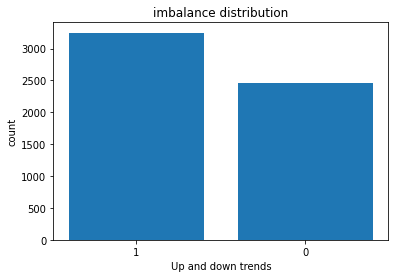

In [17]:
# 觀察資料分佈是否均匀
data['label'].value_counts()

plt.title('imbalance distribution')
plt.xlabel('Up and down trends')
plt.ylabel('count')
plt.bar(['1','0'], data['label'].value_counts())
plt.show()


#五、資料前處理

In [18]:
# 資料標準化
X = data.drop('label', axis = 1)
X[X.columns] = StandardScaler().fit_transform(X[X.columns])
y = pd.DataFrame({"label":data.label})

In [19]:
X

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom
Date,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,-0.540493,-0.540542,-0.544256,-0.545769,2.536442,0.559062,0.320244,0.432808,-0.293984,-0.449161,-0.129340,-0.023828
2000-02-21 00:00:00+08:00,-0.552044,-0.554566,-0.559785,-0.562465,3.327781,-0.776454,0.227644,0.394525,-0.483287,-1.215909,-0.730171,-0.203805
2000-02-22 00:00:00+08:00,-0.566163,-0.560941,-0.566253,-0.562465,3.678868,-0.776454,0.150974,0.347632,-0.592039,-1.311513,-1.082901,-0.188811
2000-02-23 00:00:00+08:00,-0.562312,-0.564765,-0.562372,-0.563749,1.355212,-0.863682,0.083589,0.295822,-0.654156,-1.416858,-1.316911,-0.203804
2000-02-24 00:00:00+08:00,-0.562312,-0.562215,-0.561078,-0.562465,1.588894,-0.744580,0.032384,0.243510,-0.660490,-1.370870,-1.408751,-0.188811
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,2.140519,2.126379,2.148768,2.125816,-0.465915,-0.724190,0.242526,1.451923,-3.772558,-1.385115,-1.320158,-2.699788
2022-12-26 00:00:00+08:00,2.117927,2.116761,2.139007,2.135504,-0.466312,-0.646246,-0.006022,1.160243,-3.684065,-1.486531,-1.473664,-2.324154
2022-12-27 00:00:00+08:00,2.143746,2.152026,2.161783,2.138733,-0.466276,-0.618853,-0.191978,0.887447,-3.445534,-1.504347,-1.560166,-1.461471


In [21]:
y

,label
Date,
2000-02-18 00:00:00+08:00,0
2000-02-21 00:00:00+08:00,0
2000-02-22 00:00:00+08:00,0
2000-02-23 00:00:00+08:00,0
2000-02-24 00:00:00+08:00,0
...,...
2022-12-23 00:00:00+08:00,0
2022-12-26 00:00:00+08:00,0
2022-12-27 00:00:00+08:00,0


In [22]:
# 切割成學習樣本以及測試樣本，比例為7：3
split = int(len(data)*0.7)
train_X = X.iloc[:split,:].copy()
test_X = X.iloc[split:].copy()
train_y = y.iloc[:split,:].copy()
test_y = y.iloc[split:].copy()
X_train, y_train, X_test, y_test = np.array(train_X), np.array(train_y), np.array(test_X), np.array(test_y)


In [23]:
# 將資料維度改成三維符合接下來模型所需
X_train = np.reshape(X_train, (X_train.shape[0],1,-1))
y_train = np.reshape(y_train, (y_train.shape[0],1,1))
X_test = np.reshape(X_test, (X_test.shape[0],1,-1))
y_test = np.reshape(y_test, (X_test.shape[0],1,1))

# 六、模型測試

In [24]:
### LSTM 模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization

regressor = Sequential()
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.35))
regressor.add(Dense(units = 1,activation="sigmoid"))
regressor.compile(optimizer = 'adam', loss="binary_crossentropy",metrics=["accuracy"])
print(regressor.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             5760      
                                                                 
 batch_normalization (BatchN  (None, 1, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_1 (Dropout)         (None, 1, 32)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             8320      
                                                        

In [25]:
### 模型結果(訓練集)
# 將epochs 設定為100次
train_history = regressor.fit(X_train,y_train,batch_size=200,epochs=100,verbose='2',validation_split=0.2)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

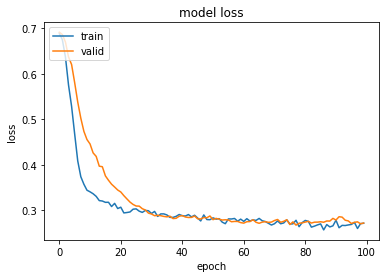

In [26]:
### 模型評估:藉Model loss 圖可看出訓練過程中兩條線有收斂情形，顯示模型無過擬合
loss = train_history.history["loss"]
var_loss = train_history.history["val_loss"]
plt.plot(loss,label="loss")
plt.plot(var_loss,label="val_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("model loss")
plt.legend(["train","valid"],loc = "upper left")
plt.show()

In [27]:
### 變數重要性:顯示MACD、台股平均本益比及RSI為重要特徵值
results = []
print(' Computing LSTM feature importance...')
# COMPUTE BASELINE (NO SHUFFLE)
oof_preds = regressor.predict(X_test, verbose='0').squeeze() 
baseline_mae = np.mean(np.abs(oof_preds-y_test))

results.append({'feature':'BASELINE','mae':baseline_mae})           

for k in tqdm(range(len(list(test_X.columns)))):
    # SHUFFLE FEATURE K
    save_col = X_test[:,:,k].copy()
    np.random.shuffle(X_test[:,:,k])
                        
    # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
    oof_preds = regressor.predict(X_test, verbose='0').squeeze() 
    mae = np.mean(np.abs( oof_preds-y_test ))
    results.append({'feature':test_X.columns[k],'mae':mae})
    X_test[:,:,k] = save_col

 Computing LSTM feature importance...


  0%|          | 0/12 [00:00<?, ?it/s]

In [28]:
### 模型結果(測試集)
rate=regressor.evaluate(X_test, y_test,verbose='1')
print('loss:',rate[0])
print('accuracy:',rate[1])

loss: 0.3827592730522156
accuracy: 0.8238039612770081
